<a href="https://colab.research.google.com/github/MevrouwHelderder/Assignments/blob/main/Assignment_Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For this assignment you're going to make several graphs based on a single dataset.**

The dataset we're using will be the first table of this Wikipedia page on carbon dioxide emissions(https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions) .

Reading in the table as-is will produce a "MultiIndex" dataframe. By renaming all columns you can convert it into a non-MultiIndex dataframe.

Use slicing and/or boolean masks to filter out the rows in this table that aren't countries.

In [ ]:
# importing the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the table
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]

# Changing column names and removing the rows that aren't about countries.
countries.columns = ["country", "1990 Fossil", "2005 Fossil", "2017 Fossil", "2017 Fossil world perc.", "2017-1990 Fossil perc. change ", "2017 Fossil per land", "2017 Fossil per capita", "2018 total inc LUCF", "2018 total ex LUCF" ]
countries = countries.loc[~countries.country.str.contains("world|european", case=False)]
countries



,country,1990 Fossil,2005 Fossil,2017 Fossil,2017 Fossil world perc.,2017-1990 Fossil perc. change,2017 Fossil per land,2017 Fossil per capita,2018 total inc LUCF,2018 total ex LUCF
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


**Graph 1: CO2 of the bigger countries**
Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years. 

           country  1990 Fossil  2005 Fossil  2017 Fossil
42           China     2397.048     6263.064    10877.218
202  United States     5085.897     5971.571     5107.393
93           India      605.968     1210.754     2454.774
158         Russia     2378.921     1733.950     1764.866
102          Japan     1149.400     1276.863     1320.776


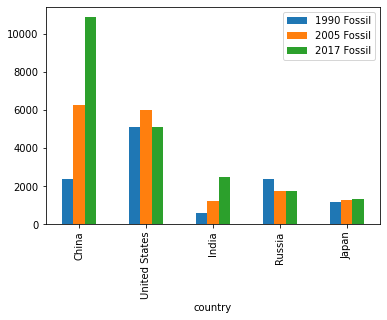

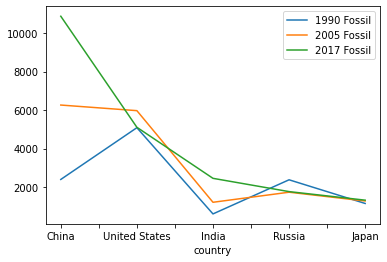

In [ ]:
# Five biggest producers, all the relevant columns
five_biggest = (countries.sort_values("2017 Fossil", ascending = False).head(5)).loc[:,["country","1990 Fossil", "2005 Fossil", "2017 Fossil"]]
# Five biggest, index set to country
country_index = five_biggest.set_index("country")
# Bar chart
bar_chart = country_index.plot.bar()
country_index.plot()

#Conclusion: Enough if we want a barchart but I need to find a way to make a linechart where the years are on the X axis


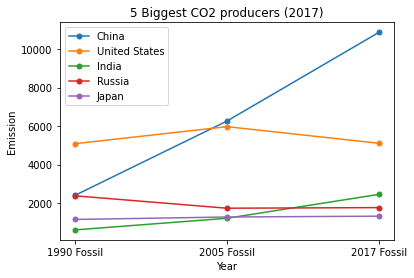

               1990 Fossil  2005 Fossil  2017 Fossil
country                                             
China             2397.048     6263.064    10877.218
United States     5085.897     5971.571     5107.393
India              605.968     1210.754     2454.774
Russia            2378.921     1733.950     1764.866
Japan             1149.400     1276.863     1320.776


Index(['1990 Fossil', '2005 Fossil', '2017 Fossil'], dtype='object')


[ 2397.048  6263.064 10877.218]
[5085.897 5971.571 5107.393]
[ 605.968 1210.754 2454.774]
[2378.921 1733.95  1764.866]
[1149.4   1276.863 1320.776]


In [64]:
# Five biggest producers, all the relevant columns, index set to country
five_biggest= ((countries.sort_values("2017 Fossil", ascending = False).head(5)).loc[:,["country","1990 Fossil", "2005 Fossil", "2017 Fossil"]]).set_index("country")



# Create the figure
fig, ax = plt.subplots()

# Define x by selecting the names of the columns
x= five_biggest.columns[0:4]

country_1 = five_biggest.iloc[0].to_numpy()
country_2 = five_biggest.iloc[1].to_numpy()
country_3 = five_biggest.iloc[2].to_numpy()
country_4 = five_biggest.iloc[3].to_numpy()
country_5 = five_biggest.iloc[4].to_numpy()
 
ax.plot(x, country_1, label=(five_biggest.index[0]), marker=".", markersize=10)
ax.plot(x, country_2, label=(five_biggest.index[1]), marker=".", markersize=10)
ax.plot(x, country_3, label=(five_biggest.index[2]), marker=".", markersize=10)
ax.plot(x, country_4, label=(five_biggest.index[3]), marker=".", markersize=10)
ax.plot(x, country_5, label=(five_biggest.index[4]), marker=".", markersize=10)

plt.title("5 Biggest CO2 producers (2017)")
plt.xlabel("Year")
plt.ylabel("Emission")
ax.legend(); 

plt.show()

print(five_biggest)
print("\n")
print(x)
print("\n")
print(China)
print(United_States)
print(India)
print(Russia)
print(Japan)



**Graph 2: worst and best changers**

Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

---
  **Note**

  If you want to add a new column to a dataframe you can do that like this:
  df['example'] = df.loc[:,'column_a'] + df.loc[:,'column_b']

---

*   The x-axis should have be the years of 1990, 2005 and 2017. 
*   If newer datapoints are added in the future please include them as well.
*   The y-axis should represent the relative amount of CO2 emitted where the    measurement in 1990 is 100%.
---

**An example:** Afghanistan emitted 2546Mt of CO2 in 1990 (which is the 100%). The relative amount in 2005 would be 1063/2546 * 100 = 41.75%. The relative amount in 2017 would be 11.422/2546 * 100 = 448.62%. So if Afghanistan is on the chart the line would go down first and then back up again.

You may get some really small countries if you look at the relative change. This can distort the chart a lot. 

To create a more useful chart: now create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.
